In [7]:
import LaurieOnTracking.Metrica_IO as mio
import LaurieOnTracking.Metrica_Viz as mviz


In [16]:
import pandas as pd 
import matplotlib.pyplot as plt

In [8]:

# set up initial path to data
DATADIR = 'sample-data/data/'
game_id = 2 # let's look at sample match 2


In [27]:
plt.style.use('dark_background')

In [17]:
# read in the event data
events = mio.read_event_data(DATADIR,game_id)

In [18]:
# count the number of each event type in the data
events['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

In [19]:
# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)

In [20]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']


In [21]:
# Frequency of each event type by team

In [22]:
away_events['Type'].value_counts()

PASS              421
CHALLENGE         151
RECOVERY          113
BALL LOST         113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: Type, dtype: int64

In [23]:
home_events['Type'].value_counts()

PASS              543
CHALLENGE         160
RECOVERY          135
BALL LOST         120
SET PIECE          34
BALL OUT           27
SHOT               13
FAULT RECEIVED      9
CARD                3
Name: Type, dtype: int64

Text(0.5,1,'Event Frequency')

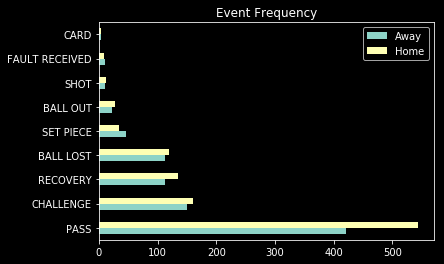

In [28]:
ax = pd.concat({
    'Home': home_events['Type'].value_counts(), 'Away': away_events['Type'].value_counts()
}, axis=1).plot.barh()
ax.set_title('Event Frequency')

In [29]:
# Get all shots
shots = events[events['Type']=='SHOT']
home_shots = home_events[home_events.Type=='SHOT']
away_shots = away_events[away_events.Type=='SHOT']

In [30]:
away_shots

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
297,Away,SHOT,BLOCKED,1,18515,740.60,18520,740.80,Player22,NaN,31.80,10.20,38.16,11.56
823,Away,SHOT,ON TARGET-GOAL,1,53049,2121.96,53075,2123.00,Player24,NaN,44.52,2.72,54.06,1.36
962,Away,SHOT,OFF TARGET-HEAD-OUT,1,63362,2534.48,63372,2534.88,Player23,NaN,45.58,0.68,54.06,-6.80
980,Away,SHOT,ON TARGET-SAVED,1,64772,2590.88,64799,2591.96,Player20,NaN,28.62,-3.40,51.94,-2.04
1058,Away,SHOT,OFF TARGET-OUT,2,69887,2795.48,69927,2797.08,Player21,NaN,-30.74,-10.88,-56.18,8.16
1277,Away,SHOT,OFF TARGET-OUT,2,86191,3447.64,86219,3448.76,Player19,NaN,-32.86,-2.72,-55.12,-6.12
1335,Away,SHOT,ON TARGET-SAVED,2,90165,3606.60,90176,3607.04,Player19,NaN,-46.64,11.56,-51.94,2.72
1666,Away,SHOT,BLOCKED,2,111758,4470.32,111763,4470.52,Player24,NaN,-43.46,7.48,-46.64,3.40
1671,Away,SHOT,ON TARGET-GOAL,2,115009,4600.36,115024,4600.96,Player20,NaN,-40.28,-1.36,-55.12,-2.72
1843,Away,SHOT,OFF TARGET-OUT,2,132570,5302.80,132597,5303.88,Player18,NaN,-33.92,8.16,-57.24,2.04


Text(0.5,1,'Shot Subtype Frequency')

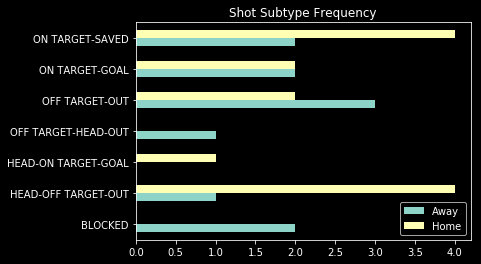

In [31]:
ax = pd.concat({
    'Home': home_shots['Subtype'].value_counts(), 'Away': away_shots['Subtype'].value_counts()
}, axis=1).plot.barh()
ax.set_title('Shot Subtype Frequency')

In [32]:
# Look at frequency of each shot Subtype
home_shots['Subtype'].value_counts()
away_shots['Subtype'].value_counts()

OFF TARGET-OUT         3
ON TARGET-GOAL         2
ON TARGET-SAVED        2
BLOCKED                2
OFF TARGET-HEAD-OUT    1
HEAD-OFF TARGET-OUT    1
Name: Subtype, dtype: int64

In [33]:
print( home_shots['From'].value_counts() )


Player9     4
Player10    3
Player5     2
Player12    1
Player4     1
Player7     1
Player3     1
Name: From, dtype: int64


In [34]:
# Get the shots that led to a goal
home_goals = home_shots[home_shots['Subtype'].str.contains('-GOAL')].copy()
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [35]:
# Add a column event 'Minute' to the data frame
home_goals['Minute'] = home_goals['Start Time [s]']/60.

In [36]:
home_goals

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Minute
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04,8.134667
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04,49.322000
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72,80.684667


Text(-47.7,-3.4,'')

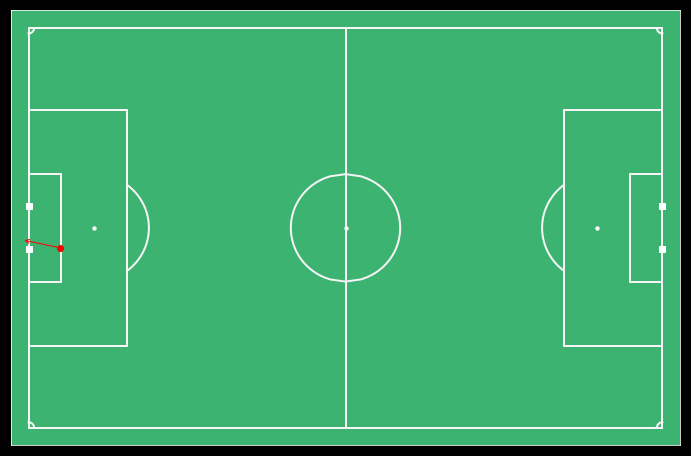

In [37]:
# Plot the first goal
fig,ax = mviz.plot_pitch()
ax.plot( events.loc[198]['Start X'], events.loc[198]['Start Y'], 'ro' )
ax.annotate("", xy=events.loc[198][['End X','End Y']], 
            xytext=events.loc[198][['Start X','Start Y']], alpha=0.6, 
            arrowprops=dict(arrowstyle="->",color='r'))


In [39]:
events[805:807]

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
805,Away,PASS,NaN,1,51824,2072.96,51842,2073.68,Player24,Player18,13.78,19.04,12.72,14.28


(<matplotlib.figure.Figure at 0x113cbbef0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x113c68e10>)

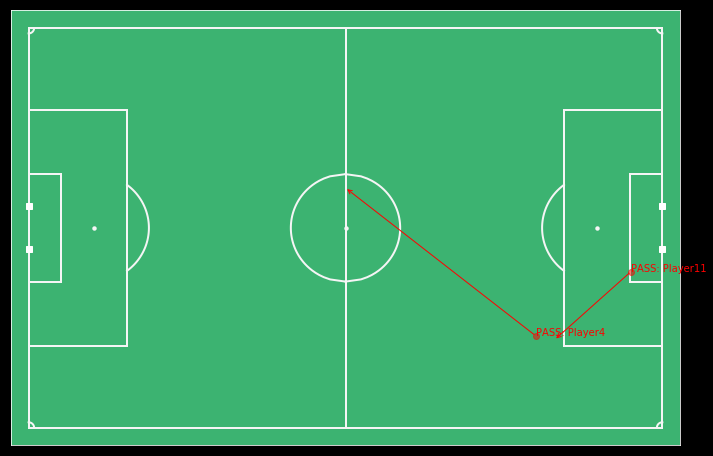

In [40]:
# plot passing move in run up to goal
mviz.plot_events( events.loc[812:813], indicators = ['Marker','Arrow'], annotate=True )

In [58]:

# READING IN TRACKING DATA
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

Reading team: home
Reading team: away


In [59]:
# Look at the column namems
print( tracking_home.columns )

Index(['Period', 'Time [s]', 'Home_11_x', 'Home_11_y', 'Home_1_x', 'Home_1_y',
       'Home_2_x', 'Home_2_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
       'Home_5_x', 'Home_5_y', 'Home_6_x', 'Home_6_y', 'Home_7_x', 'Home_7_y',
       'Home_8_x', 'Home_8_y', 'Home_9_x', 'Home_9_y', 'Home_10_x',
       'Home_10_y', 'Home_12_x', 'Home_12_y', 'Home_13_x', 'Home_13_y',
       'Home_14_x', 'Home_14_y', 'ball_x', 'ball_y'],
      dtype='object')


In [60]:
# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

In [61]:
tracking_home

,Period,Time [s],Home_11_x,Home_11_y,Home_1_x,Home_1_y,Home_2_x,Home_2_y,Home_3_x,Home_3_y,...,Home_10_x,Home_10_y,Home_12_x,Home_12_y,Home_13_x,Home_13_y,Home_14_x,Home_14_y,ball_x,ball_y
Frame,,,,,,,,,,,,,,,,,,,,,
1,1,0.04,46.93150,0.28084,15.70072,-14.54860,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.08,46.93150,0.28084,15.70072,-14.54860,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.12,46.93150,0.28084,15.70072,-14.54860,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.16,46.93150,0.28084,15.70072,-14.54860,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,0.20,46.93150,0.28084,15.70072,-14.54860,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,0.24,46.93150,0.28084,15.70072,-14.54860,18.81712,-4.89396,21.07492,3.81208,...,0.20564,7.56364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,0.28,46.93150,0.28084,15.70072,-14.54860,18.81712,-4.89396,21.07492,3.81208,...,0.09540,9.58120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,0.32,46.93150,0.28084,15.70072,-14.54860,18.81712,-4.89396,21.07492,3.81208,...,0.07738,9.95928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,0.36,46.93150,0.28084,15.70072,-14.54860,18.81712,-4.89396,21.07492,3.81208,...,0.06466,10.12316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


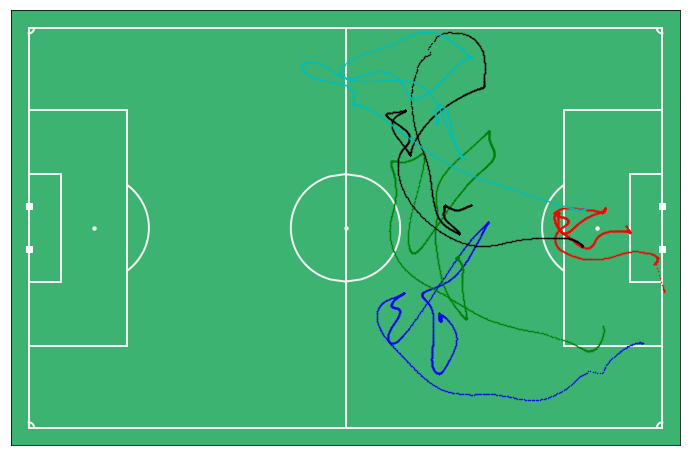

In [62]:
# Plot some player trajectories (players 11,1,2,3,4)
fig,ax = mviz.plot_pitch()
ax.plot( tracking_home['Home_11_x'].iloc[:1500], tracking_home['Home_11_y'].iloc[:1500], 'r.', MarkerSize=1)
ax.plot( tracking_home['Home_1_x'].iloc[:1500], tracking_home['Home_1_y'].iloc[:1500], 'b.', MarkerSize=1)
ax.plot( tracking_home['Home_2_x'].iloc[:1500], tracking_home['Home_2_y'].iloc[:1500], 'g.', MarkerSize=1)
ax.plot( tracking_home['Home_3_x'].iloc[:1500], tracking_home['Home_3_y'].iloc[:1500], 'k.', MarkerSize=1)
ax.plot( tracking_home['Home_4_x'].iloc[:1500], tracking_home['Home_4_y'].iloc[:1500], 'c.', MarkerSize=1)

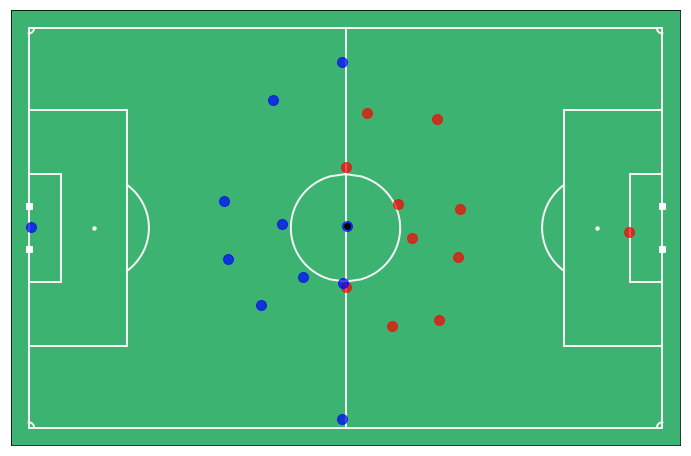

In [63]:
# plot player positions at ,atckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )

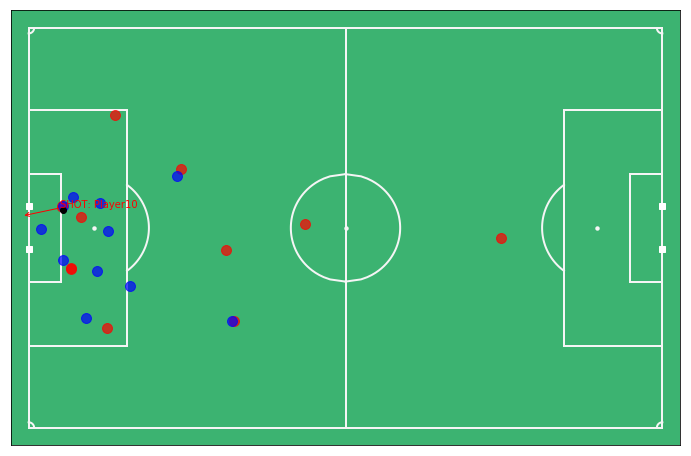

In [64]:
# PLOT POISTIONS AT GOAL
fig,ax = mviz.plot_events( events.loc[198:198], indicators = ['Marker','Arrow'], annotate=True )
goal_frame = events.loc[198]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[goal_frame], tracking_away.loc[goal_frame], figax = (fig,ax) )